# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the
content in the form of videos. It includes videos from different genres like entertainment,
education, sports, technology and so on. The maximum duration of video is 10 minutes.
Users can like, comment and share the videos on the platform.Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video
is.Understanding the engagement score of the video improves the user’s interaction with the
platform. It defines the type of content that is appealing to the user and engages the larger
audience.

# Objective

The main objective of the problem is to develop the machine learning approach to predict

the engagement score of the video on the user level.

# Data Dictionary

Variable	Description
row_id	Unique identifier of the row
user_id	Unique identifier of the user
category_id	Category of the video
video_id	Unique identifier of the video
age	Age of the user
gender	Gender of the user (Male and Female)
profession	Profession of the user (Student, Working Professional, Other)
followers	No. of users following a particular category
views	Total views of the videos present in the particular category
engagement_score	Engagement score of the video for a user

# Required imports

In [10]:
# importing necessary libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn. preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Import data

In [12]:
#import data
data=pd.read_csv("train_0OECtn8.csv")

# Understand data

In [13]:
data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [14]:
data.shape

(89197, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [16]:
#print column names with nuniques and dtypes
def df_nunique_dtypes(data):
     df=pd.DataFrame(data.nunique(),columns=['n_unique_values'])
     df['dtypes']=data.dtypes
     print(df)
df_nunique_dtypes(data)

                  n_unique_values   dtypes
row_id                      89197    int64
user_id                     27734    int64
category_id                    47    int64
video_id                      175    int64
age                            58    int64
gender                          2   object
profession                      3   object
followers                      17    int64
views                          43    int64
engagement_score              229  float64


In [17]:
data.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
row_id,44599.000000,25749.100318,1.0,22300.0,44599.00,66898.00,89197.0
user_id,13881.909806,8005.582771,1.0,6945.0,13892.00,20819.00,27734.0
category_id,18.323733,11.675154,1.0,8.0,16.00,26.00,47.0
video_id,77.715383,48.469656,1.0,34.0,76.00,120.00,175.0
age,24.848616,8.955535,10.0,18.0,23.00,32.00,68.0
followers,252.460172,46.094468,160.0,230.0,240.00,280.00,360.0
views,502.980268,268.569482,30.0,229.0,467.00,714.00,1000.0
engagement_score,3.487797,0.863498,0.0,2.9,3.71,4.15,5.0


In [18]:
data.describe(include='object').T.drop('count',axis=1)

,unique,top,freq
gender,2,Male,52397
profession,3,Student,44638


In [19]:
# apply pandas_profiling automated EDA on df and prepare a report on it.

profile=ProfileReport(data,title='Pandas Profiling Report',explorative=True)
# save the output of automated EDA in a html file
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data preprocessing

<AxesSubplot:>

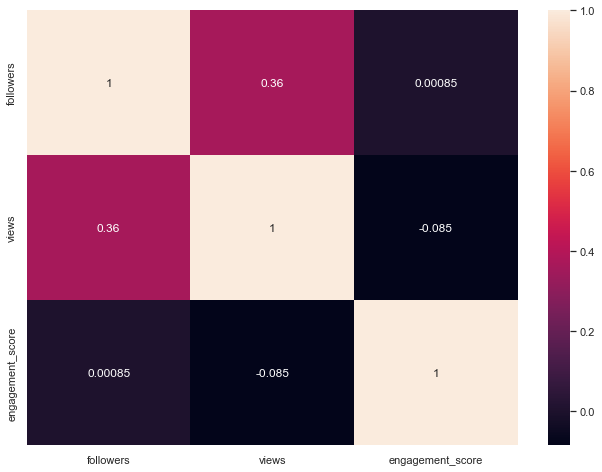

In [20]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.set_style("white")
sns.heatmap(data[['followers','views','engagement_score']].corr(),annot=True)

<AxesSubplot:xlabel='followers', ylabel='engagement_score'>

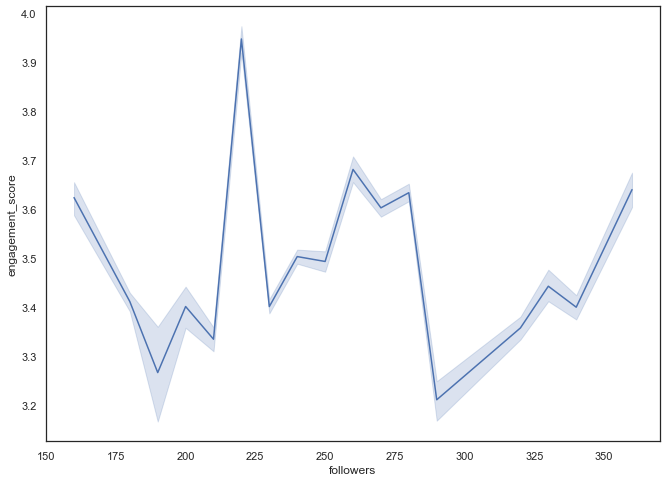

In [21]:
sns.lineplot(x='followers', y='engagement_score',data=data)

In [22]:
def pre_processing(data):
    
    data=data.copy()
    
    #drop 'row_id' column
    data.drop('row_id',axis=1,inplace=True)
    
    #adjust  dtypes
    cat_cols=['category_id','video_id','gender','profession']
    for i in cat_cols:
         data[i]=data[i].astype('category')
    
    
    #feature engineering
    #create age_bins
    data['age_bins']=pd.cut(data['age'],bins =[-np.inf,25,45,60,np.inf],labels = ['young', 'Middle_aged_1','Middle_aged_2', 'old'])
    data['category_popularity']=pd.cut(data['followers'],bins =[-np.inf,230,240,280,np.inf],labels = ['p4', 'p3','p2', 'p1'])
    data.drop('followers',axis=1,inplace=True)
    #return 'data' dataframe
    return(data)
    

In [23]:
data=pre_processing(data)

In [24]:
data.head()

,user_id,category_id,video_id,age,gender,profession,views,engagement_score,age_bins,category_popularity
0,19990,37,128,24,Male,Student,1000,4.33,young,p4
1,5304,32,132,14,Female,Student,714,1.79,young,p1
2,1840,12,24,19,Male,Student,138,4.35,young,p4
3,12597,23,112,19,Male,Student,613,3.77,young,p4
4,13626,23,112,27,Male,Working Professional,613,3.13,Middle_aged_1,p4


In [25]:
data.dtypes

user_id                   int64
category_id            category
video_id               category
age                       int64
gender                 category
profession             category
views                     int64
engagement_score        float64
age_bins               category
category_popularity    category
dtype: object

In [26]:
data.describe(include='category').T.drop('count',axis=1)

,unique,top,freq
category_id,47,5,8104
video_id,175,112,1337
gender,2,Male,52397
profession,3,Student,44638
age_bins,4,young,51062
category_popularity,4,p4,34246


 # EDA

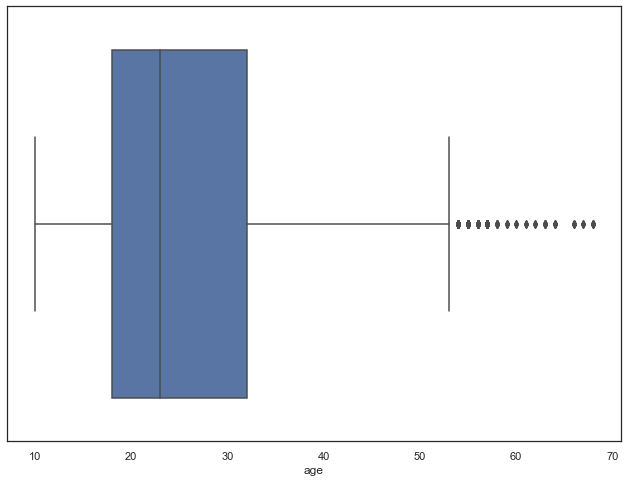

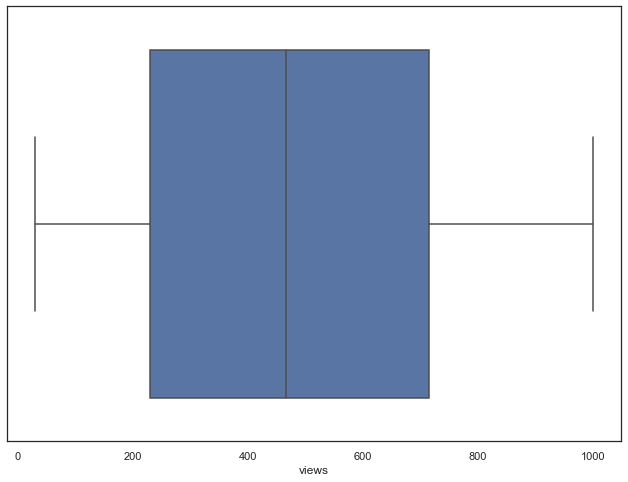

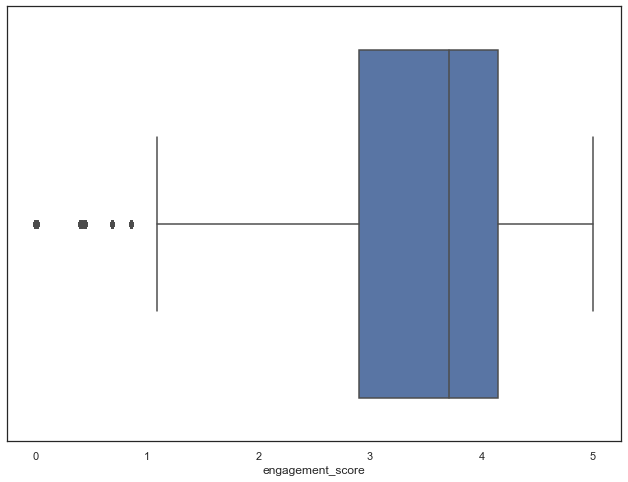

In [27]:
for i in ['age','views','engagement_score']:
    sns.boxplot(x = data[i])
    plt.show()


In [28]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.set_style("white")

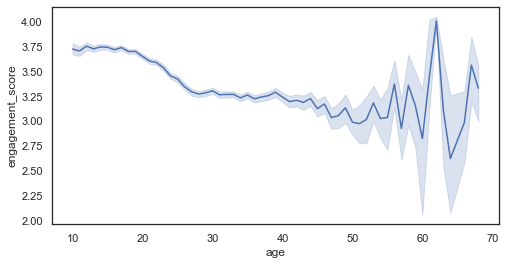

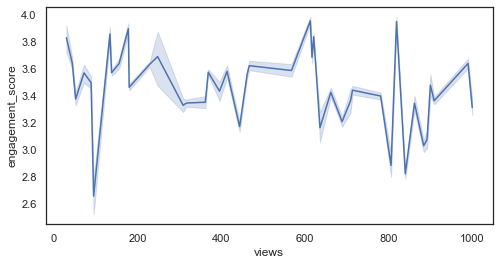

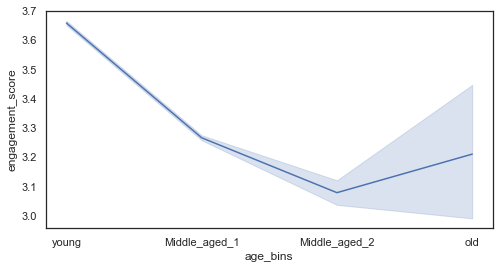

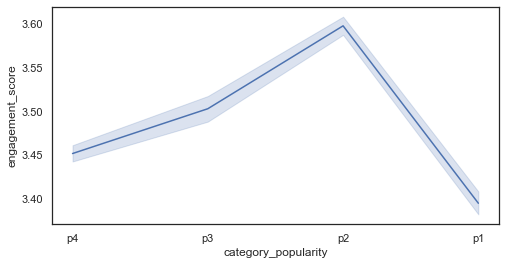

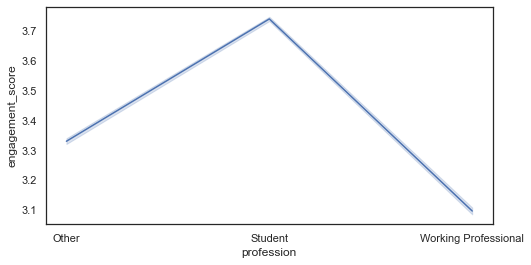

In [29]:
for i in ['age','views','age_bins','category_popularity','profession']:
    sns.lineplot(x=i,y='engagement_score',data=data)
    plt.show()

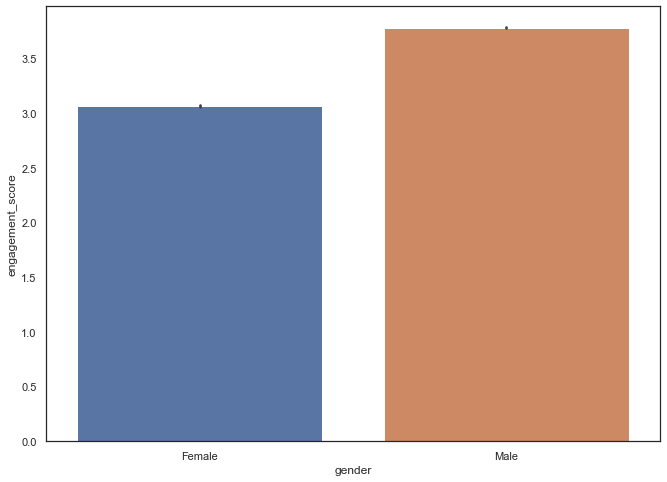

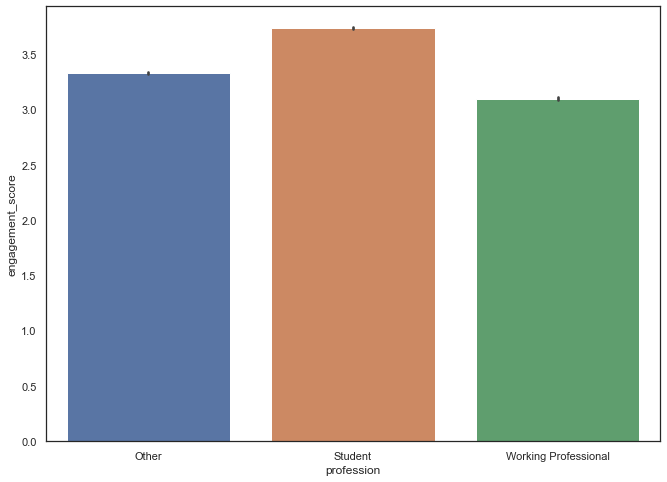

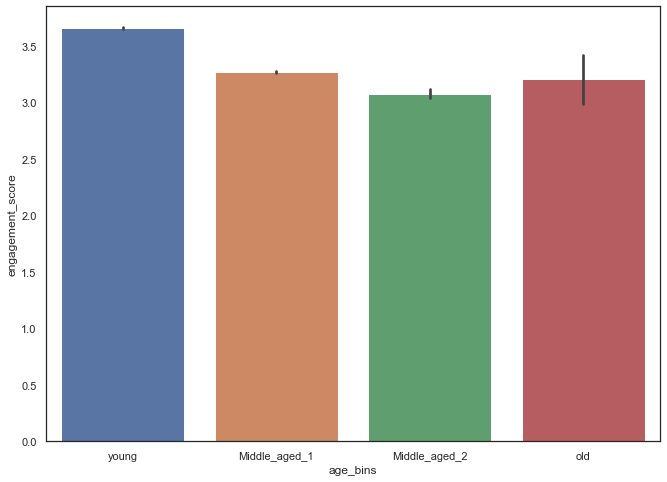

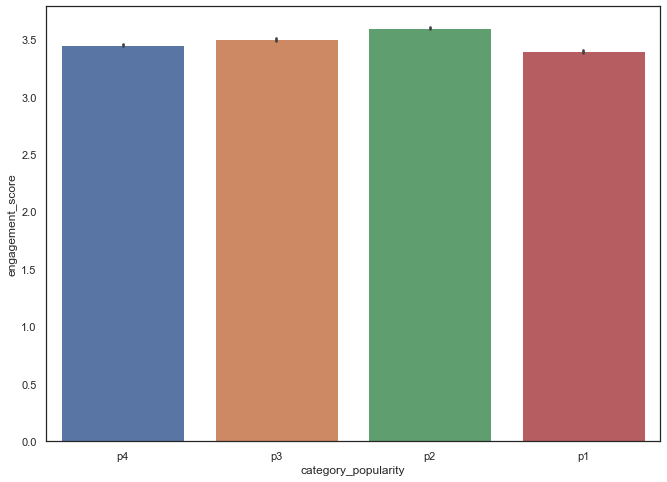

In [30]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.set_style("white")
for i in ['gender','profession','age_bins','category_popularity']:
    sns.barplot(x=i,y='engagement_score',data=data)
    plt.show()

<AxesSubplot:>

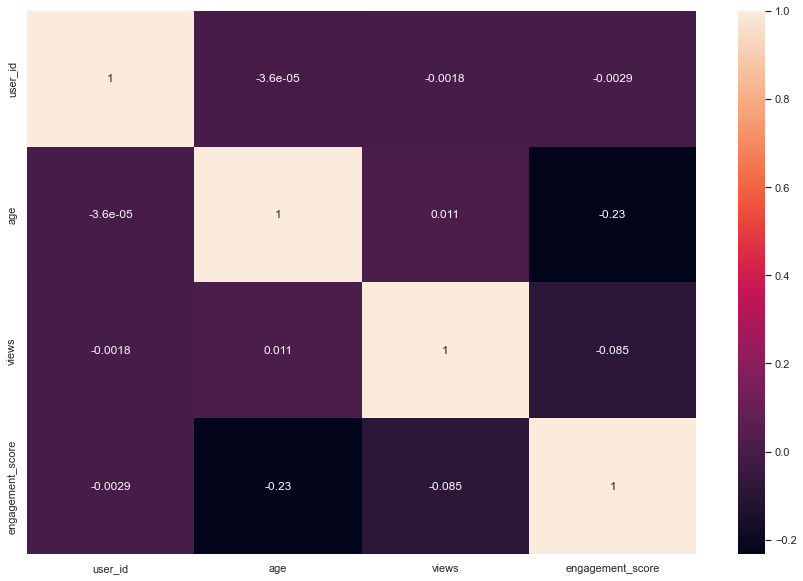

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [32]:
data['user_id'].value_counts()

5198     10
13218    10
1448     10
13410    10
7157     10
         ..
21507     2
4404      2
21430     2
17541     2
11279     2
Name: user_id, Length: 27734, dtype: int64

<AxesSubplot:xlabel='user_id', ylabel='engagement_score'>

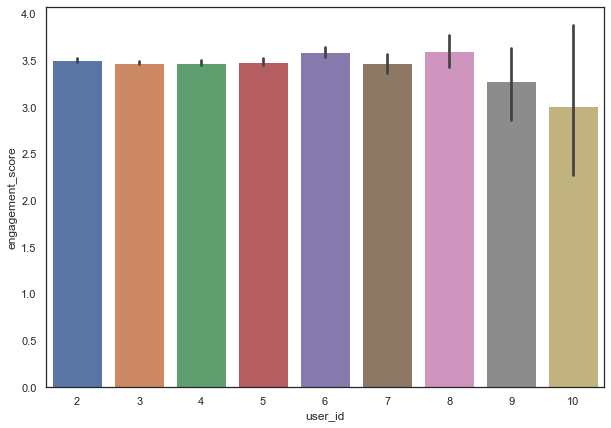

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x=data['user_id'].value_counts() ,y='engagement_score',data=data)

<AxesSubplot:ylabel='engagement_score'>

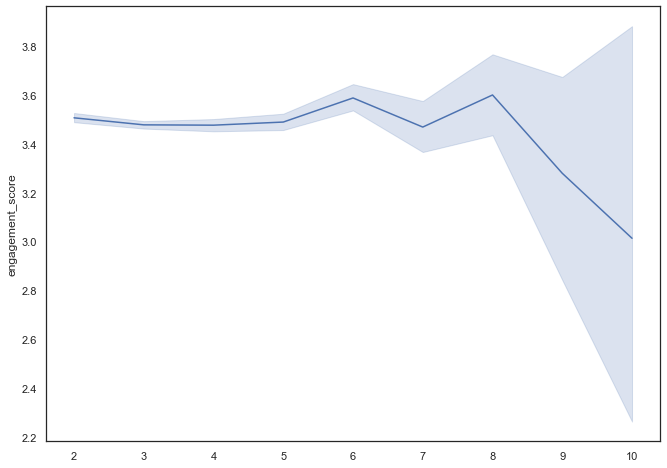

In [34]:
user_frequency=data['user_id'].value_counts().to_dict()
sns.lineplot(x=user_frequency,y=data['engagement_score'])

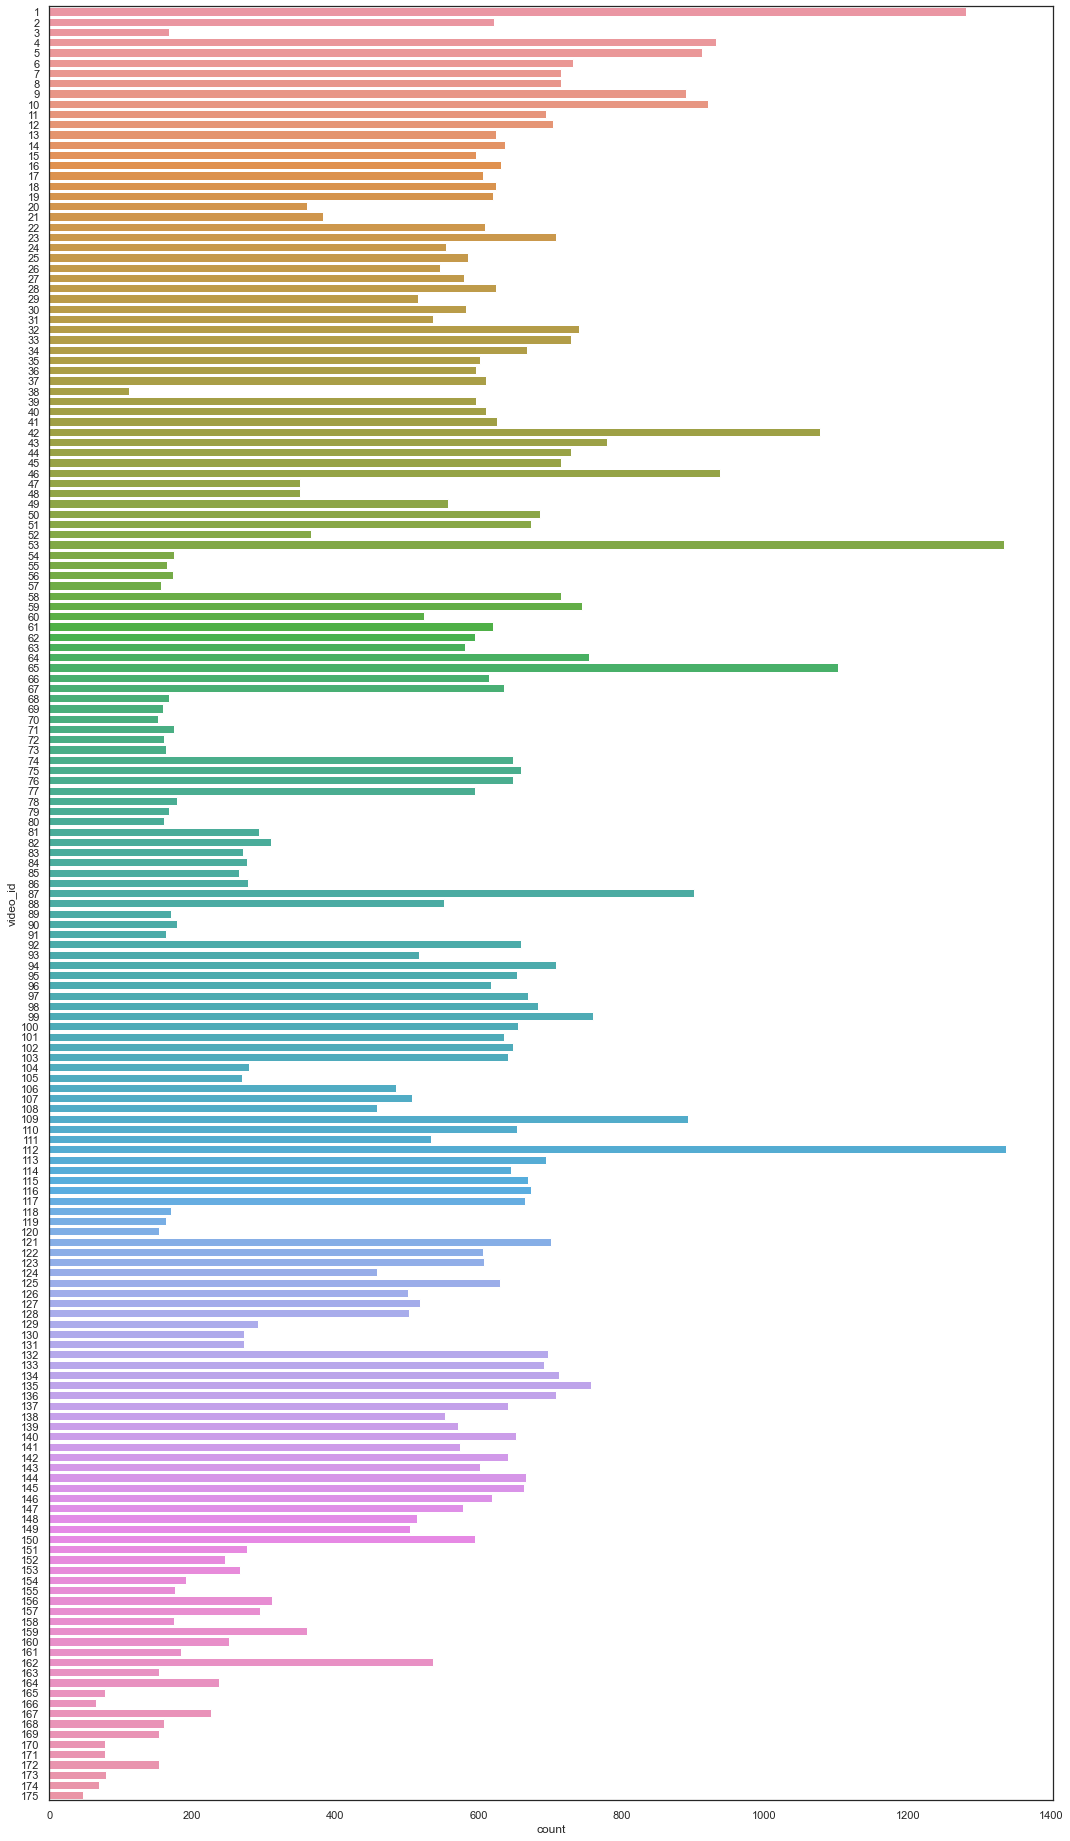

In [35]:
plt.figure(figsize=(18,33))
sns.countplot(y=data['video_id'])
plt.show()

<AxesSubplot:xlabel='video_id', ylabel='engagement_score'>

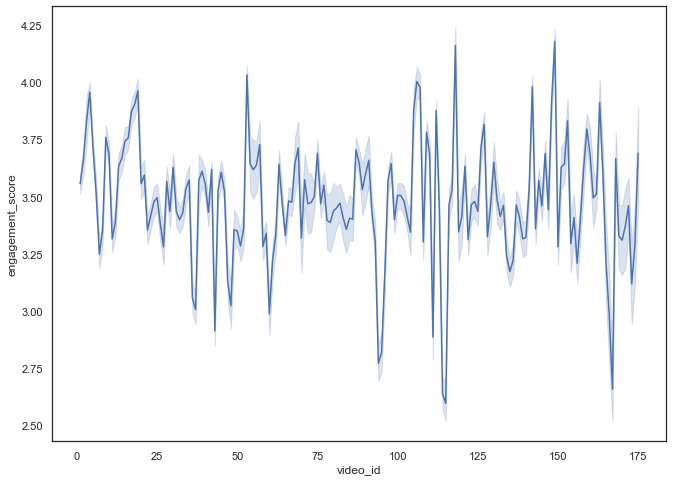

In [36]:
sns.lineplot(x=data['video_id'] ,y='engagement_score',data=data)

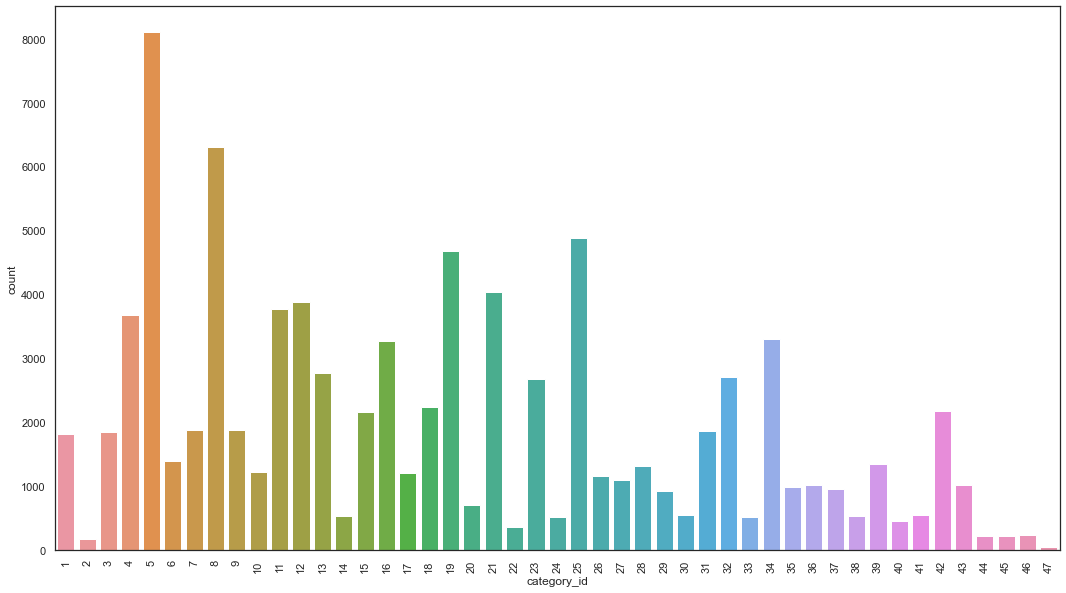

In [37]:
plt.figure(figsize=(18,10))
sns.countplot(x=data['category_id'],data=data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='category_id', ylabel='engagement_score'>

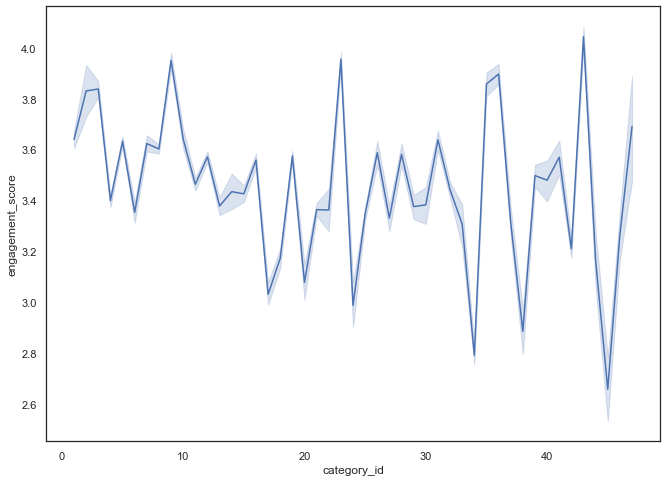

In [38]:
sns.lineplot(x=data['category_id'] ,y='engagement_score',data=data)

In [39]:
def plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

age


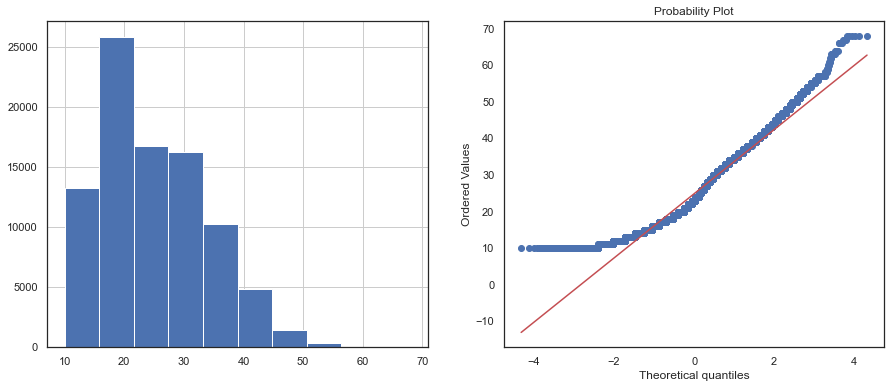

views


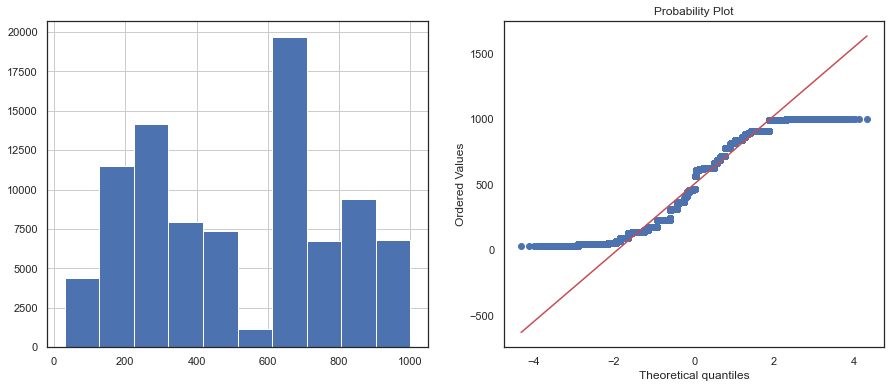

In [40]:
num_cols=['age','views']
for i in num_cols:
    print(i)
    plots(data, i)
    plt.show()
    

# Modelling

In [41]:
#split into train and test
train_x,test_x,train_y,test_y=train_test_split(data.drop(['engagement_score'],axis=1), data['engagement_score'], test_size=0.25, random_state=8)

In [42]:
train_x

,user_id,category_id,video_id,age,gender,profession,views,age_bins,category_popularity
78997,8612,25,61,34,Female,Working Professional,317,Middle_aged_1,p3
77239,25728,16,137,35,Male,Other,462,Middle_aged_1,p2
9060,17900,4,64,11,Male,Student,781,young,p4
281,580,7,28,20,Female,Working Professional,467,young,p4
53172,23974,19,46,26,Female,Working Professional,369,Middle_aged_1,p4
...,...,...,...,...,...,...,...,...,...
10376,8540,9,142,37,Male,Working Professional,819,Middle_aged_1,p4
62426,11879,23,112,11,Male,Student,613,young,p4
18417,10444,3,4,21,Male,Student,621,young,p2
25940,9287,35,106,40,Female,Other,134,Middle_aged_1,p2


In [43]:
# Remove low frequency categories remove 'video_id' and 'category_id'
def treat_low_frequency_variables(data):
    #Count frequencies for every video_id
    frequencies=data['video_id'].value_counts(normalize=True)
    #Calculate the bottom 20% percentage
    bottom_decile = frequencies.quantile(q=0.20)
    #Find videos with frequencies less than 20%
    low_freq_video_id = frequencies[frequencies<=bottom_decile]
    
    #Change  low frequency video_id s to 'other'
    for i in data['video_id'].unique():
        if i in low_freq_video_id:
            data['video_id']=data['video_id'].replace(i, "1000")
    
    
     #Count frequencies for every category_id
    frequencies=data['category_id'].value_counts(normalize=True)
    #Calculate the bottom 20% percentage
    bottom_decile = frequencies.quantile(q=0.20)
    #Find category_id s with frequencies less than 20%
    low_freq_category_id = frequencies[frequencies<=bottom_decile]
    
    #Change  low frequency category_id s to 'other'
    for i in data['category_id'].unique():
        if i in low_freq_category_id:
            data['category_id']=data['category_id'].replace(i, "1000")         
            
    return data

In [44]:
train_x=treat_low_frequency_variables(train_x)
test_x=treat_low_frequency_variables(test_x)

In [45]:
#ecode category features
def encoding(data):
    cat_cols_nominal=['gender','profession','age_bins']
    for i in cat_cols_nominal:
        dummies = pd.get_dummies(data[i], prefix=i, drop_first=True)
        data = pd.concat([data, dummies], axis=1)
        data.drop(i,axis=1,inplace=True)
        
    encoder_base_n= ce.BaseNEncoder(cols=['video_id','category_id'],return_df=True,base=5)
    data=encoder_base_n.fit_transform(data)
    
    popularity=['p4','p3','p2','p1']
    encoder_ordinal = OrdinalEncoder(categories=[popularity])
    data['category_popularity']=encoder_ordinal.fit_transform(data[['category_popularity']])
    
    
    encoder_ordinal = OrdinalEncoder()
    data['age']=encoder_ordinal.fit_transform(data[['age']])
    
    
    #find user value_counts(frequency) and store to a dic
    user_frequency=data['user_id'].value_counts().to_dict()
    #Replace user_id values with their frequencies
    data['user_frequency']=data['user_id'].map(user_frequency)
    data.drop('user_id',axis=1,inplace=True)
    
    return data 


In [46]:
train_x=encoding(train_x)
test_x=encoding(test_x)

In [47]:
# storing 'tarin_x' after encoding in 'dataset' dataframe for future reference(useful while predicting values for new test dataset to compare features after encoding)
dataset_train=train_x.copy()

In [48]:
dataset_train

,category_id_0,category_id_1,category_id_2,video_id_0,video_id_1,video_id_2,video_id_3,age,views,category_popularity,gender_Male,profession_Student,profession_Working Professional,age_bins_Middle_aged_1,age_bins_Middle_aged_2,age_bins_old,user_frequency
78997,0,0,1,0,0,0,1,24.0,317,1.0,0,0,1,1,0,0,4
77239,0,0,2,0,0,0,2,25.0,462,2.0,1,0,0,1,0,0,4
9060,0,0,3,0,0,0,3,1.0,781,0.0,1,1,0,0,0,0,3
281,0,0,4,0,0,0,4,10.0,467,0.0,0,0,1,0,0,0,4
53172,0,1,0,0,0,1,0,16.0,369,0.0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,0,1,2,0,2,0,4,27.0,819,0.0,1,0,1,1,0,0,3
62426,0,1,4,0,0,2,0,1.0,613,0.0,1,1,0,0,0,0,3
18417,0,2,3,0,0,4,0,11.0,621,2.0,1,1,0,0,0,0,3
25940,1,2,2,1,0,2,4,30.0,134,2.0,0,0,0,1,0,0,4


In [49]:
# scaling

def model_ready(train_x,test_x):
    
    # scaling
   
    #poly = PolynomialFeatures(degree=2)
    #train_x = poly.fit_transform(train_x)
    #test_x = poly.transform(test_x)
       
    # scaling     
    scaler = preprocessing.StandardScaler()
    train_x= scaler.fit_transform(train_x)
    test_x=scaler.transform(test_x)
    
    return train_x,test_x,scaler
    
   

In [50]:
train_x,test_x,scaler=model_ready(train_x,test_x)

In [51]:
def linear_model(train_x,test_x,train_y,test_y):
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    # feed the data to linear regression
    lr_model1 = lr.fit(train_x, train_y)
    
    df_test=pd.DataFrame(test_y)

    #predict text_y values
    predictions = lr_model1.predict(test_x)
    
    #store the prediction in a data frame
    df_test['predictions']=predictions

    #calculate error
    pr_error = df_test['engagement_score'] - df_test['predictions']
    #store the error in a data frame
    df_test['pr_error'] = pr_error
    
    print("R2-score  (linear regression): %.2f" % r2_score(df_test['engagement_score'] , df_test['predictions']))
    
    return df_test 

In [52]:
df_test=linear_model(train_x,test_x,train_y,test_y)

R2-score  (linear regression): 0.25


In [53]:
df_test

,engagement_score,predictions,pr_error
53967,2.80,3.235659,-0.435659
78291,3.95,3.675993,0.274007
4161,3.89,2.834459,1.055541
40258,3.45,3.530548,-0.080548
16540,3.11,3.034721,0.075279
...,...,...,...
57997,3.26,3.374280,-0.114280
82048,3.85,3.217373,0.632627
88789,3.71,2.904547,0.805453
42647,4.68,3.411285,1.268715


## model selection

In [54]:
models = {
   
    "                     Linear Regression":LinearRegression(), 
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(),
    "                              LightGBM": LGBMRegressor(),
    "                              CatBoost": CatBoostRegressor(verbose=0)
}


In [55]:
for name, model in models.items():
    model.fit(train_x, train_y)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.
                              CatBoost trained.


In [56]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(test_x, test_y)))

                     Linear Regression R^2 Score: 0.24602
 Linear Regression (L2 Regularization) R^2 Score: 0.24602
 Linear Regression (L1 Regularization) R^2 Score: -0.00012
                   K-Nearest Neighbors R^2 Score: 0.07894
                        Neural Network R^2 Score: 0.16368
Support Vector Machine (Linear Kernel) R^2 Score: 0.23529
   Support Vector Machine (RBF Kernel) R^2 Score: 0.15310
                         Decision Tree R^2 Score: -0.44432
                         Random Forest R^2 Score: 0.21993
                     Gradient Boosting R^2 Score: 0.28955
                               XGBoost R^2 Score: 0.27849
                              LightGBM R^2 Score: 0.30298
                              CatBoost R^2 Score: 0.27739


In [57]:
test_y=pd.DataFrame(test_y)

In [58]:
for name, model in models.items():
    if name=="                              LightGBM":
        print(name + " R^2 Score: {:.5f}".format(model.score(test_x, test_y)))
        predictions_df=pd.DataFrame(test_y)
        predictions_df['predictions']=model.predict(test_x)

                              LightGBM R^2 Score: 0.30298


In [59]:
predictions_df

,engagement_score,predictions
53967,2.80,2.878150
78291,3.95,3.541138
4161,3.89,2.602123
40258,3.45,3.394523
16540,3.11,3.008990
...,...,...
57997,3.26,3.545980
82048,3.85,3.390439
88789,3.71,2.897296
42647,4.68,3.326652


# predictions on new test set

In [60]:
#import new data set to which we predict engagement_score
data_test=pd.read_csv("test_1zqHu22.csv")
data_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [62]:
# save the role ids  as we need them in submission file
m=data_test['row_id']  
df=pd.DataFrame(m)
df

,row_id
0,89198
1,89199
2,89200
3,89201
4,89202
...,...
11116,100314
11117,100315
11118,100316
11119,100317


In [63]:
# perform data pre_processing activities on new test dataset that are applied on train data
data_test = pre_processing(data_test)

In [64]:
#perform encoding
data_test=encoding(data_test)

In [65]:
data_test.shape

(11121, 16)

In [66]:
dataset_train.shape

(66897, 17)

In [67]:
data_test.columns

Index(['category_id_0', 'category_id_1', 'video_id_0', 'video_id_1',
       'video_id_2', 'video_id_3', 'age', 'views', 'category_popularity',
       'gender_Male', 'profession_Student', 'profession_Working Professional',
       'age_bins_Middle_aged_1', 'age_bins_Middle_aged_2', 'age_bins_old',
       'user_frequency'],
      dtype='object')

In [68]:
dataset_train.columns

Index(['category_id_0', 'category_id_1', 'category_id_2', 'video_id_0',
       'video_id_1', 'video_id_2', 'video_id_3', 'age', 'views',
       'category_popularity', 'gender_Male', 'profession_Student',
       'profession_Working Professional', 'age_bins_Middle_aged_1',
       'age_bins_Middle_aged_2', 'age_bins_old', 'user_frequency'],
      dtype='object')

In [69]:
# since 'category_id_2' feature is missing after encoding, we add that with all zeros
data_test['category_id_2']=0

In [70]:
#data_test = poly.transform(data_test)
data_test=scaler.transform(data_test)

In [71]:
# predict values using 'LightGBM' algorithm/model
for name, model in models.items():
    if name=="                              LightGBM":
        df['predictions']=model.predict(data_test)

In [72]:
df

,row_id,predictions
0,89198,3.896799
1,89199,3.961716
2,89200,3.158357
3,89201,3.860990
4,89202,3.654551
...,...,...
11116,100314,3.810424
11117,100315,3.935610
11118,100316,3.851442
11119,100317,3.317743


In [73]:
# save data frame(df) as a csv file
df.to_csv('engagement_score_df.csv')